In [1]:
import pandas as pd

In [2]:
stk=pd.read_csv("WIPRO.NS.csv")
stk.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,233.625061,240.000061,232.087555,237.412552,232.183533,4467194
1,2018-01-02,236.887558,243.000061,235.837555,239.025055,233.760513,3832689
2,2018-01-03,240.300064,240.300064,231.562561,232.462555,227.342560,2930235
3,2018-01-04,232.575058,234.750061,230.587555,233.737564,228.589478,1952778
4,2018-01-05,234.750061,235.425064,230.775055,232.162552,227.049164,2150939


In [3]:
to_drop=['High','Low','Adj Close','Volume']
stk.drop(columns=to_drop, inplace=True, axis=1)
stk['Date'] = pd.to_datetime(stk['Date'])
stk.set_index('Date',drop=True,inplace=True) 
stk.head()

,Open,Close
Date,,
2018-01-01,233.625061,237.412552
2018-01-02,236.887558,239.025055
2018-01-03,240.300064,232.462555
2018-01-04,232.575058,233.737564
2018-01-05,234.750061,232.162552


C:\Users\Vinay\AppData\Local\Temp\ipykernel_16024\1147303108.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


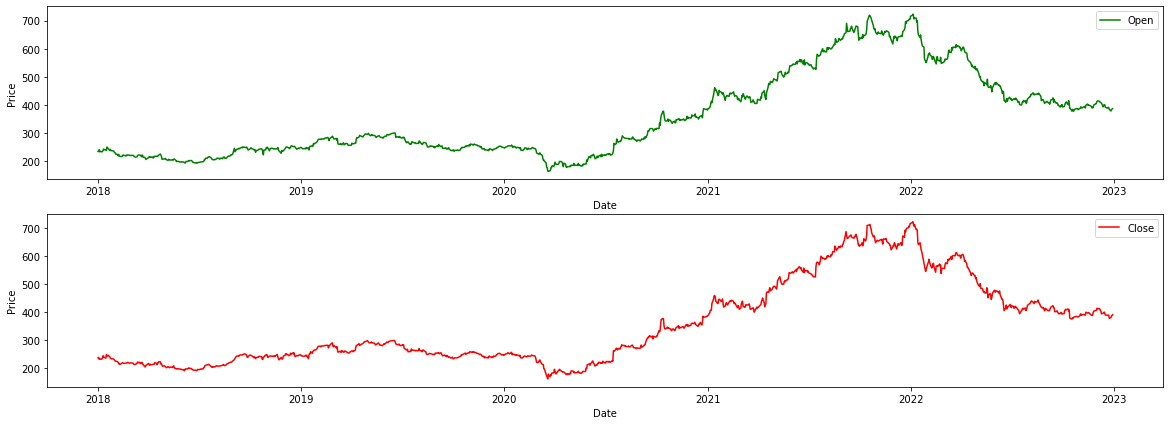

In [4]:
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax= plt.subplots(2,1,figsize=(20,7))
ax[0].plot(stk['Open'],label='Open',color='green')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()
ax[1].plot(stk['Close'],label='Close',color='red')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[1].legend()
fig.show()

In [5]:
len(stk)

1235

In [6]:
from sklearn.preprocessing import MinMaxScaler
MS=MinMaxScaler() 
stk[stk.columns]=MS.fit_transform(stk)

In [7]:
stk.head()

,Open,Close
Date,,
2018-01-01,0.126016,0.134244
2018-01-02,0.131846,0.137128
2018-01-03,0.137943,0.125391
2018-01-04,0.124140,0.127672
2018-01-05,0.128027,0.124855


In [8]:
len(stk)

1235

In [9]:
training_size=round(len(stk)*0.80)
train_data=stk[:training_size]
test_data=stk[training_size:]

In [10]:
len(train_data)

988

In [11]:
len(test_data)

247

In [12]:
import numpy as np
import tensorflow as tf
def create_sequence(dataset):
  sequences = []
  labels = []
  start_idx = 0
  for stop_idx in range(5,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [13]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [14]:
import tensorflow as tf
train_seq=tf.convert_to_tensor(train_seq)
train_label=tf.convert_to_tensor(train_label)
test_seq=tf.convert_to_tensor(test_seq)
test_label=tf.convert_to_tensor(test_label)

In [15]:
len(train_seq)

983

In [16]:
len(test_seq)

242

In [17]:
train_seq.shape[1]

5

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [19]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=100))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10600     
                                                                 
 dropout (Dropout)           (None, 5, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 71,202
Trainable params: 71,202
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(train_seq, train_label, epochs=300,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/300
31/31 [==============================] - 4s 27ms/step - loss: 0.0356 - mean_absolute_error: 0.1266 - accuracy: 0.4903 - val_loss: 0.0110 - val_mean_absolute_error: 0.0980 - val_accuracy: 0.4793
Epoch 2/300
31/31 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0296 - accuracy: 0.4852 - val_loss: 0.0012 - val_mean_absolute_error: 0.0244 - val_accuracy: 0.5207
Epoch 3/300
31/31 [==============================] - 0s 6ms/step - loss: 6.1903e-04 - mean_absolute_error: 0.0168 - accuracy: 0.5412 - val_loss: 8.2125e-04 - val_mean_absolute_error: 0.0204 - val_accuracy: 0.5165
Epoch 4/300
31/31 [==============================] - 0s 6ms/step - loss: 5.3627e-04 - mean_absolute_error: 0.0155 - accuracy: 0.5320 - val_loss: 8.2287e-04 - val_mean_absolute_error: 0.0202 - val_accuracy: 0.3967
Epoch 5/300
31/31 [==============================] - 0s 6ms/step - loss: 5.5531e-04 - mean_absolute_error: 0.0158 - accuracy: 0.5178 - val_loss: 9.4819e-04 - val_m

31/31 [==============================] - 0s 6ms/step - loss: 4.0600e-04 - mean_absolute_error: 0.0139 - accuracy: 0.5320 - val_loss: 8.1889e-04 - val_mean_absolute_error: 0.0214 - val_accuracy: 0.5207
Epoch 40/300
31/31 [==============================] - 0s 6ms/step - loss: 3.8433e-04 - mean_absolute_error: 0.0130 - accuracy: 0.5748 - val_loss: 7.3527e-04 - val_mean_absolute_error: 0.0199 - val_accuracy: 0.4835
Epoch 41/300
31/31 [==============================] - 0s 6ms/step - loss: 3.6183e-04 - mean_absolute_error: 0.0129 - accuracy: 0.5066 - val_loss: 7.7397e-04 - val_mean_absolute_error: 0.0206 - val_accuracy: 0.5165
Epoch 42/300
31/31 [==============================] - 0s 6ms/step - loss: 3.5641e-04 - mean_absolute_error: 0.0128 - accuracy: 0.5473 - val_loss: 8.1295e-04 - val_mean_absolute_error: 0.0207 - val_accuracy: 0.4793
Epoch 43/300
31/31 [==============================] - 0s 6ms/step - loss: 3.8923e-04 - mean_absolute_error: 0.0130 - accuracy: 0.5270 - val_loss: 6.1894e-04 

31/31 [==============================] - 0s 6ms/step - loss: 3.4774e-04 - mean_absolute_error: 0.0128 - accuracy: 0.5259 - val_loss: 5.8719e-04 - val_mean_absolute_error: 0.0175 - val_accuracy: 0.4793
Epoch 78/300
31/31 [==============================] - 0s 6ms/step - loss: 2.9606e-04 - mean_absolute_error: 0.0116 - accuracy: 0.5036 - val_loss: 8.9826e-04 - val_mean_absolute_error: 0.0228 - val_accuracy: 0.4793
Epoch 79/300
31/31 [==============================] - 0s 6ms/step - loss: 3.8400e-04 - mean_absolute_error: 0.0133 - accuracy: 0.5381 - val_loss: 4.3836e-04 - val_mean_absolute_error: 0.0163 - val_accuracy: 0.5165
Epoch 80/300
31/31 [==============================] - 0s 5ms/step - loss: 3.8680e-04 - mean_absolute_error: 0.0135 - accuracy: 0.5270 - val_loss: 5.6751e-04 - val_mean_absolute_error: 0.0172 - val_accuracy: 0.4793
Epoch 81/300
31/31 [==============================] - 0s 6ms/step - loss: 3.7436e-04 - mean_absolute_error: 0.0130 - accuracy: 0.5575 - val_loss: 8.9399e-04 

31/31 [==============================] - 0s 7ms/step - loss: 2.5265e-04 - mean_absolute_error: 0.0106 - accuracy: 0.5432 - val_loss: 5.6975e-04 - val_mean_absolute_error: 0.0177 - val_accuracy: 0.4793
Epoch 116/300
31/31 [==============================] - 0s 7ms/step - loss: 2.4798e-04 - mean_absolute_error: 0.0106 - accuracy: 0.5381 - val_loss: 5.7141e-04 - val_mean_absolute_error: 0.0179 - val_accuracy: 0.4793
Epoch 117/300
31/31 [==============================] - 0s 7ms/step - loss: 2.3386e-04 - mean_absolute_error: 0.0105 - accuracy: 0.5493 - val_loss: 4.9568e-04 - val_mean_absolute_error: 0.0167 - val_accuracy: 0.5207
Epoch 118/300
31/31 [==============================] - 0s 6ms/step - loss: 3.1788e-04 - mean_absolute_error: 0.0121 - accuracy: 0.5331 - val_loss: 5.9846e-04 - val_mean_absolute_error: 0.0181 - val_accuracy: 0.4876
Epoch 119/300
31/31 [==============================] - 0s 5ms/step - loss: 2.2514e-04 - mean_absolute_error: 0.0102 - accuracy: 0.5371 - val_loss: 4.4364e

31/31 [==============================] - 0s 6ms/step - loss: 1.9469e-04 - mean_absolute_error: 0.0093 - accuracy: 0.5361 - val_loss: 3.6617e-04 - val_mean_absolute_error: 0.0145 - val_accuracy: 0.5207
Epoch 154/300
31/31 [==============================] - 0s 6ms/step - loss: 2.0129e-04 - mean_absolute_error: 0.0097 - accuracy: 0.4863 - val_loss: 3.9260e-04 - val_mean_absolute_error: 0.0150 - val_accuracy: 0.5248
Epoch 155/300
31/31 [==============================] - 0s 6ms/step - loss: 2.4275e-04 - mean_absolute_error: 0.0107 - accuracy: 0.5463 - val_loss: 2.4335e-04 - val_mean_absolute_error: 0.0116 - val_accuracy: 0.5207
Epoch 156/300
31/31 [==============================] - 0s 6ms/step - loss: 2.7096e-04 - mean_absolute_error: 0.0116 - accuracy: 0.5117 - val_loss: 4.5376e-04 - val_mean_absolute_error: 0.0163 - val_accuracy: 0.5289
Epoch 157/300
31/31 [==============================] - 0s 6ms/step - loss: 1.9655e-04 - mean_absolute_error: 0.0095 - accuracy: 0.5524 - val_loss: 5.9265e

31/31 [==============================] - 0s 6ms/step - loss: 2.1274e-04 - mean_absolute_error: 0.0103 - accuracy: 0.5392 - val_loss: 5.2049e-04 - val_mean_absolute_error: 0.0179 - val_accuracy: 0.5165
Epoch 192/300
31/31 [==============================] - 0s 6ms/step - loss: 1.7287e-04 - mean_absolute_error: 0.0089 - accuracy: 0.5544 - val_loss: 3.4598e-04 - val_mean_absolute_error: 0.0157 - val_accuracy: 0.4917
Epoch 193/300
31/31 [==============================] - 0s 6ms/step - loss: 1.9152e-04 - mean_absolute_error: 0.0094 - accuracy: 0.5148 - val_loss: 6.0910e-04 - val_mean_absolute_error: 0.0194 - val_accuracy: 0.5124
Epoch 194/300
31/31 [==============================] - 0s 6ms/step - loss: 1.8681e-04 - mean_absolute_error: 0.0093 - accuracy: 0.5259 - val_loss: 2.4450e-04 - val_mean_absolute_error: 0.0109 - val_accuracy: 0.4793
Epoch 195/300
31/31 [==============================] - 0s 6ms/step - loss: 2.0696e-04 - mean_absolute_error: 0.0100 - accuracy: 0.4852 - val_loss: 6.5517e

31/31 [==============================] - 0s 6ms/step - loss: 1.4237e-04 - mean_absolute_error: 0.0078 - accuracy: 0.5463 - val_loss: 1.8845e-04 - val_mean_absolute_error: 0.0095 - val_accuracy: 0.5207
Epoch 230/300
31/31 [==============================] - 0s 6ms/step - loss: 1.4778e-04 - mean_absolute_error: 0.0083 - accuracy: 0.5453 - val_loss: 1.9493e-04 - val_mean_absolute_error: 0.0100 - val_accuracy: 0.5207
Epoch 231/300
31/31 [==============================] - 0s 6ms/step - loss: 1.6383e-04 - mean_absolute_error: 0.0087 - accuracy: 0.5412 - val_loss: 1.8240e-04 - val_mean_absolute_error: 0.0097 - val_accuracy: 0.4793
Epoch 232/300
31/31 [==============================] - 0s 6ms/step - loss: 1.5341e-04 - mean_absolute_error: 0.0085 - accuracy: 0.5361 - val_loss: 2.1838e-04 - val_mean_absolute_error: 0.0103 - val_accuracy: 0.5331
Epoch 233/300
31/31 [==============================] - 0s 6ms/step - loss: 1.8675e-04 - mean_absolute_error: 0.0095 - accuracy: 0.5351 - val_loss: 2.0838e

31/31 [==============================] - 0s 6ms/step - loss: 2.6315e-04 - mean_absolute_error: 0.0112 - accuracy: 0.5412 - val_loss: 3.9722e-04 - val_mean_absolute_error: 0.0154 - val_accuracy: 0.4793
Epoch 268/300
31/31 [==============================] - 0s 6ms/step - loss: 2.1149e-04 - mean_absolute_error: 0.0099 - accuracy: 0.5585 - val_loss: 1.8501e-04 - val_mean_absolute_error: 0.0094 - val_accuracy: 0.4793
Epoch 269/300
31/31 [==============================] - 0s 6ms/step - loss: 1.8971e-04 - mean_absolute_error: 0.0094 - accuracy: 0.5056 - val_loss: 1.9535e-04 - val_mean_absolute_error: 0.0109 - val_accuracy: 0.4793
Epoch 270/300
31/31 [==============================] - 0s 6ms/step - loss: 1.4007e-04 - mean_absolute_error: 0.0083 - accuracy: 0.5290 - val_loss: 3.9888e-04 - val_mean_absolute_error: 0.0150 - val_accuracy: 0.4793
Epoch 271/300
31/31 [==============================] - 0s 6ms/step - loss: 1.4638e-04 - mean_absolute_error: 0.0081 - accuracy: 0.5534 - val_loss: 2.8996e

In [21]:
test_predicted = model.predict(test_seq)

8/8 [==============================] - 1s 2ms/step


In [22]:
test_inverse_predicted = MS.inverse_transform(test_predicted)

In [23]:
# Merging actual and predicted data for better visualization
stk_slic_data = pd.concat([stk.iloc[-242:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=stk.iloc[-242:].index)], axis=1)

In [24]:
stk_slic_data[['Open','Close']] = MS.inverse_transform(stk_slic_data[['Open','Close']])

In [25]:
stk_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2022-01-10,709.000000,693.500000,715.439392,709.518799
2022-01-11,695.000000,694.150024,698.855835,692.950684
2022-01-12,700.000000,691.349976,699.315674,693.654785
2022-01-13,663.200012,649.750000,696.118652,690.480530
2022-01-14,649.250000,639.799988,660.040771,654.706726


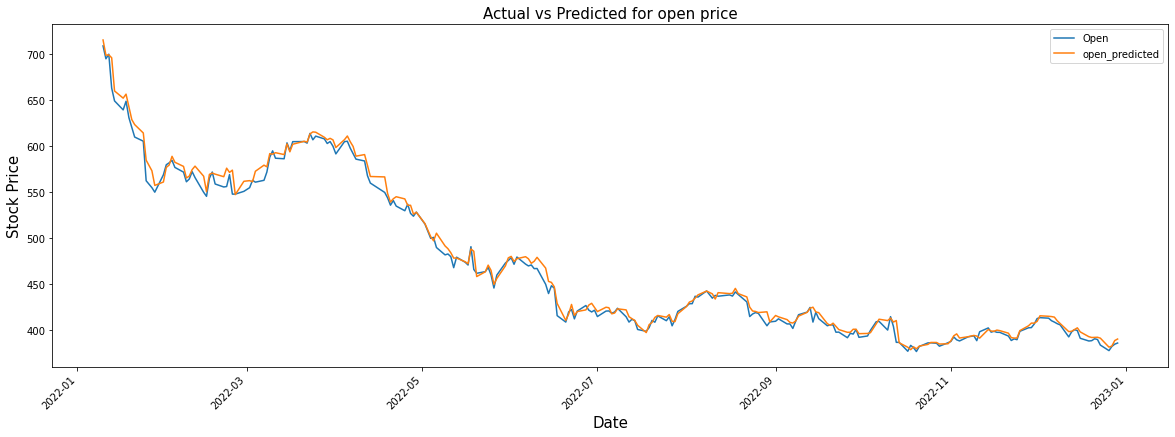

In [27]:
stk_slic_data[['Open','open_predicted']].plot(figsize=(20,7))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

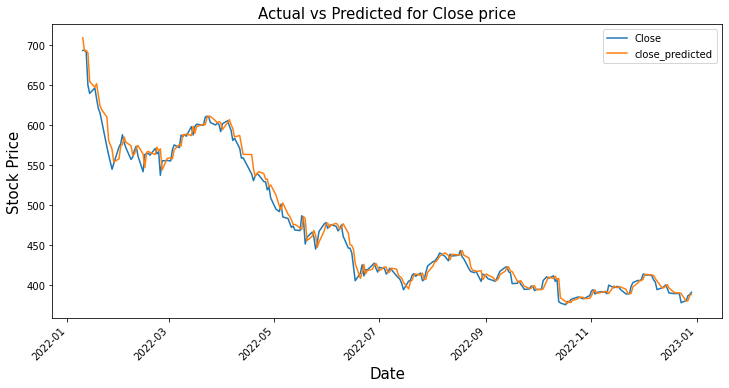

In [28]:
stk_slic_data[['Close','close_predicted']].plot(figsize=(12,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Close price',size=15)
plt.show()